In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [ ]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [ ]:
#Horizontal 
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [ ]:
#Vertical 
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

# **Task 1**. 
### Design your code to compute diagonal gradient of the image used in the example and visualize it

In [ ]:
#Diagonal
gz = np.empty(image.shape, dtype=np.double)
gz[0,0] = 0
gz[1,1] = 0
gz[1:-1:1] = image[:-2, :] - image[2:, :]

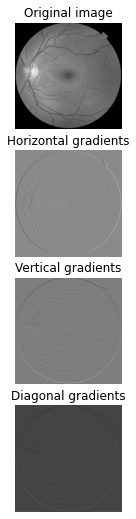

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')
ax4.axis('off')
ax4.imshow(gz, cmap=plt.cm.gray)
ax4.set_title('Diagonal gradients')
ax4.set_adjustable('box')


# **Question 1** 
### Explain why we don’t directly use the simplest image features (color or number of pixels)

# **ANSWER 1:** 

### The reason that we dont directly use the simplest image features like color or number of pixels and the color value dont tell the full story of a picture. We need to be able to see corners and edges of objects in an image to effectively classify it. 

In [ ]:
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

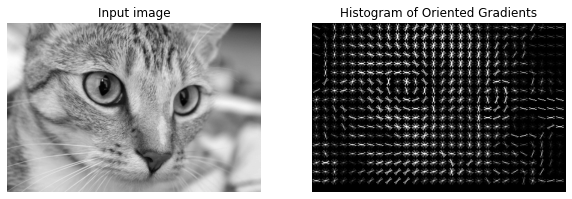

In [ ]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

# **Task 2.** 
### ORB keypoints extraction and visualization

### Apart from HOG image features, another popular image feature is ORB.  Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

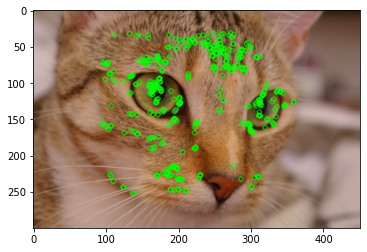

(<matplotlib.image.AxesImage at 0x7f4bcd35dd10>, None)

In [ ]:
#ORB KEYPOINTS

img = data.chelsea()
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

#**Link to all Data** 
https://drive.google.com/drive/folders/1TFapnLN7D0EGOjK99m8lSgDn86rCA8AG?usp=sharing

# **Task 3.** 
### Bag-of-Visual-Words for multiple images

### Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [ ]:
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [ ]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [ ]:
#Creat list of NP.Array values of each Image in dataset
matrix_list=[]
import cv2
import glob
path = "/content/drive/MyDrive/5222.Data/dogs/*.*"
for file in glob.glob(path):
   read_file= cv2.imread(file)
   matrix_list.append(read_file)

In [ ]:
#Clustering the bag of visual words with KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 30)

kp_holder = []
desc_lis_holder = [] 
kmeanfit_holder = []
count = 0
count_2 = 0


for i in matrix_list:
  kp, descriptor_list = features(matrix_list[count])
  kp_holder.append(kp)
  desc_lis_holder.append(descriptor_list)
  count += 1

for i in range(0,10):
  kmeanfit_var = kmeans.fit(desc_lis_holder[i])
  kmeanfit_holder.append(kmeanfit_var)


preprocessed_image = []
for image in matrix_list:
  keypoint, descriptor = features(image)
  # image = gray(image)
  if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeanfit_holder[count_2])
          preprocessed_image.append(histogram)
          count_2 += 1

Text(0.5, 1.0, 'The histogram of visual words')

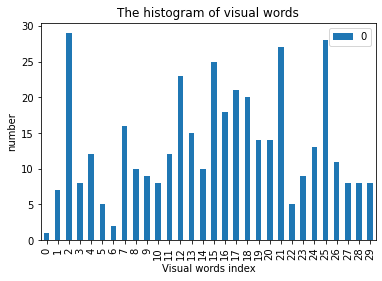

In [ ]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

# **Question 2.** 
### Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

# **ANSWER 2.**
### Feature scaling is the practice of normalizing the features of a data set to a finite range.It is performed during the data pre-processing to handle highly varying magnitudes or values or units. In the case of visual data, scaling would only have any effect on images that vary in color. If black and white images are being compared to color, there would a big difference int he range of data. Aside from that, all other data to be gathered from images in already normalized

# **Question 3.** 
### What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

# **ANSWER 3.**

### The main advantage that ORB has over SURF is that features recognized by ORB tend to be concentrated on object at the center of a given image. On the other hand, SURF tends to identify features all across the image which makes it more likely to recognize features that are not relveant to the image.  

# **Task 4.** 

### Extract text from image

### Image file is given along with ICE-5-2.ipynb in canvas assignment .
### Save it in drive and use get shareable link to everyone option . Image file name is ExtractText4.jpeg
### Please extract the image from image file and print the text that you extracted.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/drive/MyDrive/5222.Data/read_text/ExtractText4.jpeg'))

In [ ]:
print(extractedInformation)

oe

Education is the
passport to the future,
for tomorrow belongs
to those who prepare

for it today.

Malcolm X



# **Task 5.** 
### Design code to implement ORB using OpenCV. Please use a face image (Preferably your face image as its unique).

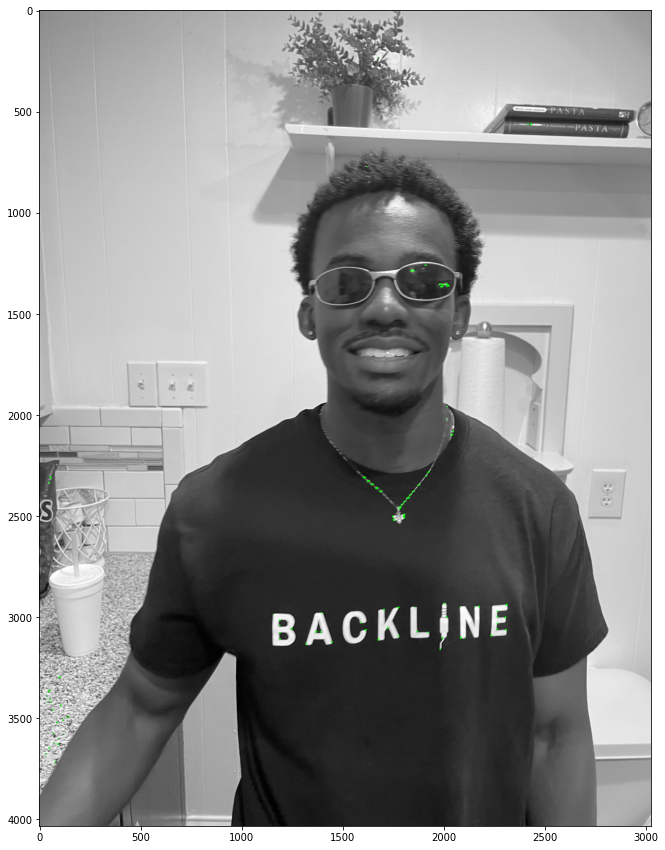

(<matplotlib.image.AxesImage at 0x7f4bc642d190>, None)

In [ ]:
#ORB KEYPOINTS

img = cv.imread('/content/drive/MyDrive/5222.Data/Faces/FaceImg_Train.jpeg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.figure(figsize = (15,15))
plt.imshow(img2), plt.show()

In [ ]:
# Number of Keypoints

print("There are: " + str(len(kp)) + ' key points in the training image')

There are: 500 key points in the training image


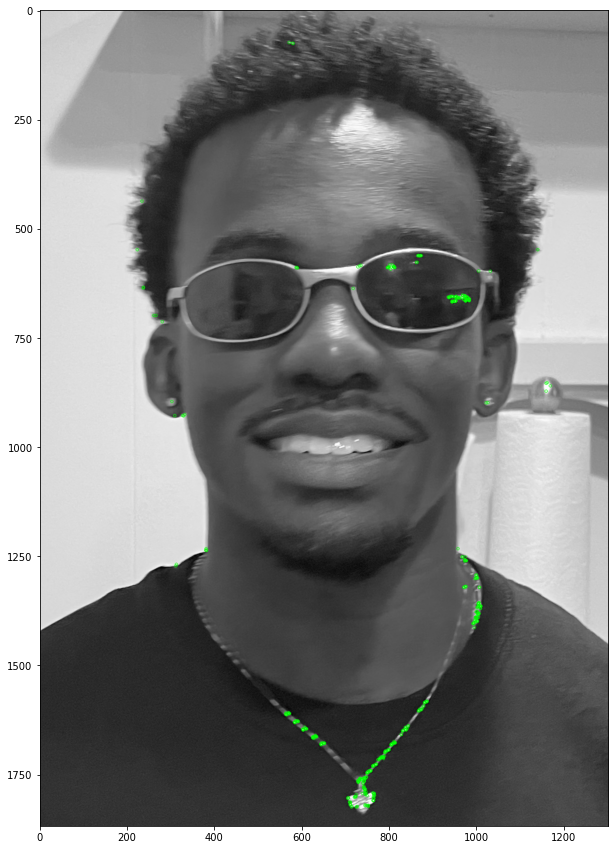

(<matplotlib.image.AxesImage at 0x7f4bc63a2990>, None)

In [ ]:
#ORB KEYPOINTS

img = cv.imread('/content/drive/MyDrive/5222.Data/Faces/FaceImg_Test.jpeg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.figure(figsize = (15,15))
plt.imshow(img2), plt.show()

In [ ]:
print("There are: " + str(len(kp)) + ' key points in the test image')

There are: 500 key points in the test image


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('/content/drive/MyDrive/5222.Data/Faces/FaceImg_Train.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/5222.Data/Faces/FaceImg_Test.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


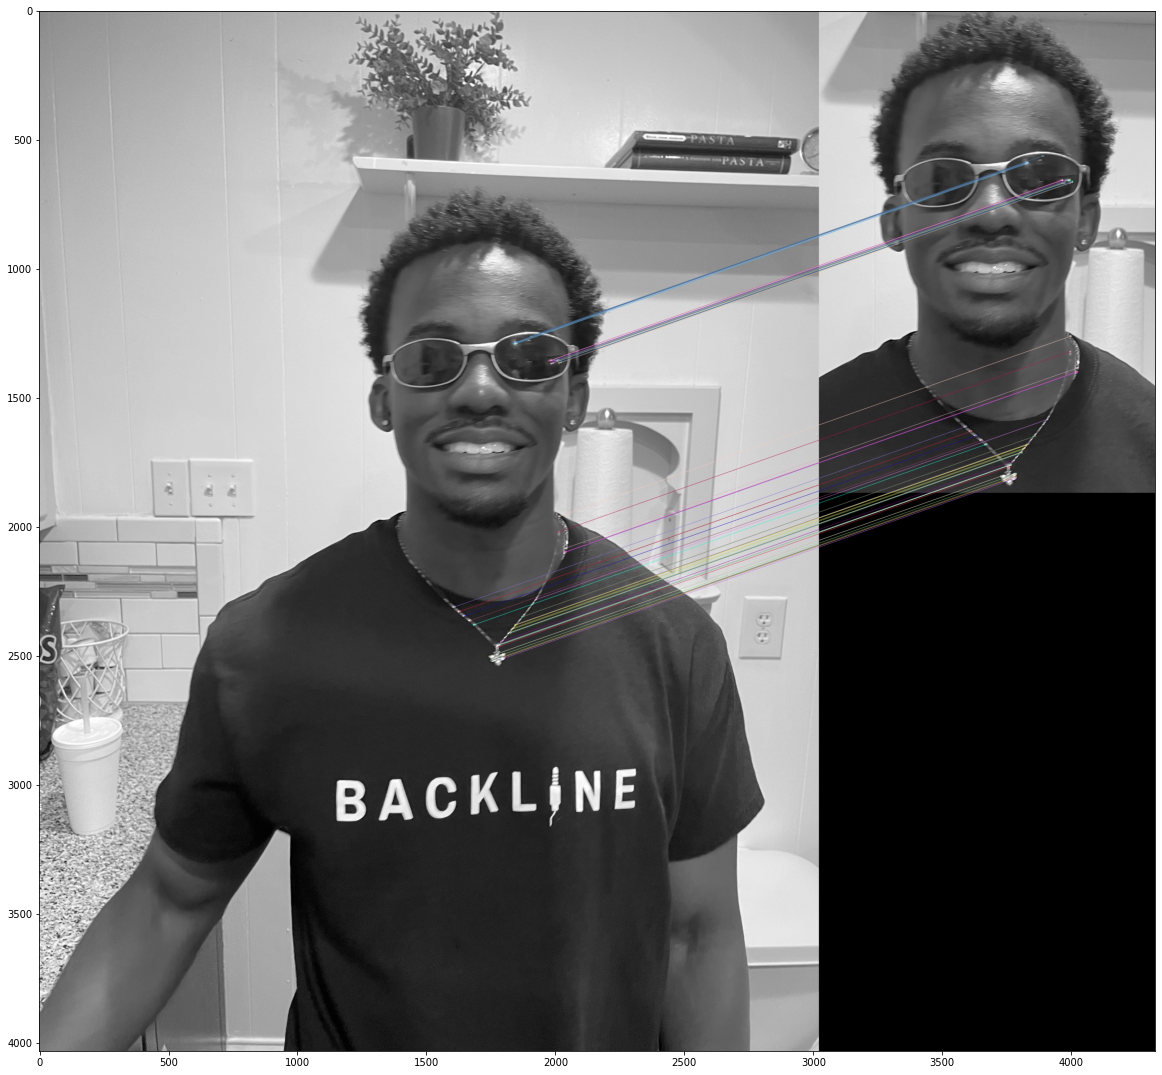

(<matplotlib.image.AxesImage at 0x7f4bc631ab90>, None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:65],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,20))
plt.imshow(img3),plt.show()